In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class MultiArmedBanditUCB:
    def __init__(self, n_arms):
        # Initialize the number of arms
        self.n_arms = n_arms
        # True probabilities of success for each arm (unknown to the agent)
        self.probabilities = np.random.rand(n_arms)
        # Estimated probabilities of success for each arm (what the agent learns over time)
        self.estimates = np.zeros(n_arms)
        # Number of times each arm has been pulled
        self.counts = np.zeros(n_arms)
        # Total number of times arms have been pulled
        self.total_pulls = 0

    def pull_arm(self, arm):
        """Simulates pulling an arm. Returns 1 for success, 0 for failure."""
        return 1 if np.random.rand() < self.probabilities[arm] else 0

    def update_estimates(self, arm, reward):
        """Updates the estimated probability of success for the arm based on the reward."""
        # Increment the number of pulls for the arm
        self.counts[arm] += 1
        self.total_pulls += 1
        # Update the estimated probability using the average of observed rewards
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]

    def select_ucb_arm(self):
        """Selects an arm using the Upper Confidence Bound (UCB) strategy."""
        if self.total_pulls < self.n_arms:
            # Ensure each arm is pulled at least once
            return self.total_pulls
        else:
            # Calculate UCB for each arm
            ucb_values = np.zeros(self.n_arms)
            for arm in range(self.n_arms):
                if self.counts[arm] > 0:
                    confidence_interval = np.sqrt(2 * np.log(self.total_pulls) / self.counts[arm])
                    ucb_values[arm] = self.estimates[arm] + confidence_interval
            return np.argmax(ucb_values)

def ucb_strategy(bandit, n_rounds):
    """Runs the UCB strategy and returns the cumulative rewards and pull counts."""
    total_reward = 0
    rewards = []
    arm_pulls = np.zeros(bandit.n_arms)

    for _ in range(n_rounds):
        # Select an arm using UCB
        arm = bandit.select_ucb_arm()
        # Pull the selected arm
        reward = bandit.pull_arm(arm)
        # Update the estimate for the selected arm
        bandit.update_estimates(arm, reward)
        # Update total reward and arm pull counts
        total_reward += reward
        rewards.append(total_reward)
        arm_pulls[arm] += 1

    return rewards, arm_pulls

In [11]:
# paramters
n_arms = 10                 # number of arms
n_rounds = 1000             # number of pulls(iterations)

# Create the multi-armed bandit
bandit = MultiArmedBanditUCB(n_arms)

# apply the UCB strategy
rewards, arm_pulls = ucb_strategy(bandit, n_rounds)

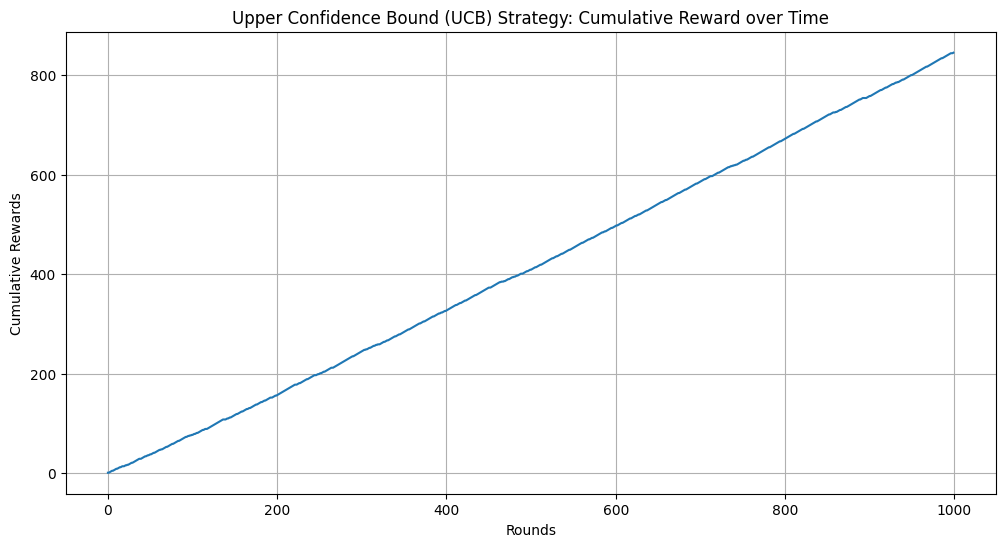

In [12]:
# visualization: Cululative reward over time
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel("Rounds")
plt.ylabel("Cumulative Rewards")
plt.title("Upper Confidence Bound (UCB) Strategy: Cumulative Reward over Time")
plt.grid(True)
plt.show()

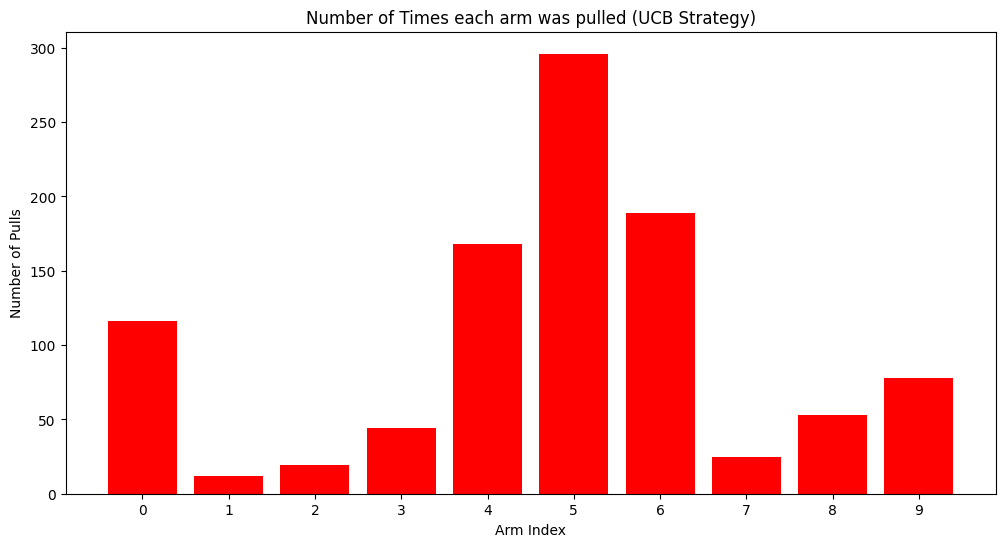

In [14]:
# Visualization: Number of time each arm was pulled
plt.figure(figsize=(12,6))
plt.bar(range(n_arms), arm_pulls, color='red')
plt.xlabel("Arm Index")
plt.ylabel("Number of Pulls")
plt.title("Number of Times each arm was pulled (UCB Strategy)")
plt.xticks(range(n_arms))
plt.show()